<a href="https://colab.research.google.com/github/MananDesai2997/MananDesai2997/blob/main/RexolitePlate_RandomForestClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification

# Importing the libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [9]:
import io
from google.colab import files

In [10]:
uploaded = files.upload()

Saving MODEL_A.csv to MODEL_A.csv


In [11]:
dataset = pd.read_csv(io.BytesIO(uploaded['MODEL_A.csv']))

In [12]:
dataset

,Sequence_Number,Job_Number,Revision_Group,Week_Number,SH1_C2_Diameter -14.020,SH1_B5_Diameter -0.220_1,SH1_B5_Diameter -0.220_2,SH1_B5_Diameter -0.160_1,SH1_B5_Diameter -0.160_2,SH1_B5_Position -0.005_1,...,SH2_A8_Diameter -0.650_1,SH2_A8_Diameter -0.650_2,SH2_A8_Diameter -0.650_3,SH2_A8_True Position -0.003_1,SH2_A8_True Position -0.003_2,SH2_A8_True Position -0.003_3,SH5 A8_SURFACE FINISH_1,SH5 A4_SURFACE FINISH_2,SH1 B5_DEPTH .100,RCAI_Defect
0,1,1,1,1,14.01740,0.22220,0.22240,0.16120,0.16130,0.00070,...,0.65180,0.65180,0.65180,0.00060,0.00120,0.00120,7.00,7.00,0.101,1
1,2,2,1,2,14.01601,0.22146,0.22200,0.16120,0.16115,0.00037,...,0.65162,0.65170,0.65174,0.00193,0.00085,0.00117,7.00,7.00,0.101,1
2,3,2,1,2,14.01594,0.22180,0.22201,0.16120,0.16121,0.00073,...,0.65170,0.65171,0.65170,0.00119,0.00084,0.00102,7.00,7.00,0.101,0
3,4,2,1,2,14.01848,0.22179,0.22190,0.16118,0.16117,0.00032,...,0.65171,0.65175,0.65175,0.00163,0.00108,0.00104,7.00,7.00,0.101,0
4,5,2,1,2,14.01607,0.22183,0.22203,0.16119,0.16112,0.00025,...,0.65170,0.65169,0.65171,0.00081,0.00083,0.00113,11.27,8.33,0.099,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,415,12,2,23,14.01592,0.22124,0.22143,0.16046,0.16046,0.00152,...,0.65210,0.65210,0.65213,0.00117,0.00039,0.00093,7.00,7.00,0.102,0
407,416,12,2,23,14.01756,0.22127,0.22148,0.16046,0.16048,0.00066,...,0.65213,0.65212,0.65213,0.00228,0.00084,0.00112,7.00,7.00,0.102,1
408,417,12,2,23,14.01847,0.22127,0.22146,0.16047,0.16048,0.00006,...,0.65211,0.65211,0.65213,0.00195,0.00061,0.00136,7.00,7.00,0.103,1
409,418,12,2,23,14.01795,0.22128,0.22149,0.16047,0.16049,0.00047,...,0.65211,0.65211,0.65212,0.00177,0.00077,0.00105,7.00,7.00,0.101,1


In [13]:
X = dataset.iloc[:,:-1].values
Y = dataset.iloc[:,46:47].values

In [14]:
print(X)

[[1.00e+00 1.00e+00 1.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 [2.00e+00 2.00e+00 1.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 [3.00e+00 2.00e+00 1.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 ...
 [4.17e+02 1.20e+01 2.00e+00 ... 7.00e+00 7.00e+00 1.03e-01]
 [4.18e+02 1.20e+01 2.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 [4.19e+02 1.20e+01 2.00e+00 ... 7.00e+00 7.00e+00 1.02e-01]]


In [15]:
print(Y)

[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]


In [16]:
dataset.shape

(411, 47)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sequence_Number                411 non-null    int64  
 1   Job_Number                     411 non-null    int64  
 2   Revision_Group                 411 non-null    int64  
 3   Week_Number                    411 non-null    int64  
 4   SH1_C2_Diameter -14.020        411 non-null    float64
 5   SH1_B5_Diameter -0.220_1       411 non-null    float64
 6   SH1_B5_Diameter -0.220_2       411 non-null    float64
 7   SH1_B5_Diameter -0.160_1       411 non-null    float64
 8   SH1_B5_Diameter -0.160_2       411 non-null    float64
 9   SH1_B5_Position -0.005_1       411 non-null    float64
 10  SH1_B5_Position -0.005_2       411 non-null    float64
 11  SH1_B1_Width -0.190            411 non-null    float64
 12  SH1_B1_Distance -0.200         411 non-null    flo

# Taking care of missing data

Impute Missing Values. 

In [18]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer.fit(X[:, :])
X[:,:] = imputer.transform(X[:,:])

In [19]:
print(X)

[[1.00e+00 1.00e+00 1.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 [2.00e+00 2.00e+00 1.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 [3.00e+00 2.00e+00 1.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 ...
 [4.17e+02 1.20e+01 2.00e+00 ... 7.00e+00 7.00e+00 1.03e-01]
 [4.18e+02 1.20e+01 2.00e+00 ... 7.00e+00 7.00e+00 1.01e-01]
 [4.19e+02 1.20e+01 2.00e+00 ... 7.00e+00 7.00e+00 1.02e-01]]


In [20]:
print(Y)

[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]


Check the percentage of missing values in each variable.

In [21]:
dataset.isnull().sum()/len(dataset)*100

Sequence_Number                  0.0
Job_Number                       0.0
Revision_Group                   0.0
Week_Number                      0.0
SH1_C2_Diameter -14.020          0.0
SH1_B5_Diameter -0.220_1         0.0
SH1_B5_Diameter -0.220_2         0.0
SH1_B5_Diameter -0.160_1         0.0
SH1_B5_Diameter -0.160_2         0.0
SH1_B5_Position -0.005_1         0.0
SH1_B5_Position -0.005_2         0.0
SH1_B1_Width -0.190              0.0
SH1_B1_Distance -0.200           0.0
SH1_B1_Position- 0.002           0.0
SH1_D5_Position -0.005_1         0.0
SH1_D5_Position -0.005_2         0.0
SH1_D5_Position -0.005_3         0.0
SH1_D5_Position -0.005_4         0.0
SH2_D7_Width -0.190              0.0
SH2_D7_Distance -0.20            0.0
SH2_D7_Position- 0.002           0.0
SH2_B1_Position -0.005_1         0.0
SH2_B1_Position -0.005_2         0.0
SH2_B1_Position -0.005_3         0.0
SH2_B1_Position -0.005_4         0.0
SH2_B1_Position -0.005_5         0.0
SH2_B1_Position -0.005_6         0.0
S

# Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [23]:
print(X_train)

[[2.160e+02 1.000e+01 2.000e+00 ... 7.000e+00 7.000e+00 1.000e-01]
 [1.890e+02 9.000e+00 2.000e+00 ... 7.000e+00 7.000e+00 1.010e-01]
 [2.500e+02 1.000e+01 2.000e+00 ... 7.000e+00 8.000e+00 1.000e-01]
 ...
 [1.180e+02 5.000e+00 1.000e+00 ... 9.000e+00 9.000e+00 1.010e-01]
 [4.800e+01 2.000e+00 1.000e+00 ... 9.000e+00 8.000e+00 1.010e-01]
 [1.750e+02 8.000e+00 2.000e+00 ... 8.000e+00 8.000e+00 1.005e-01]]


In [24]:
print(X_test)

[[3.010e+02 1.000e+01 2.000e+00 ... 7.000e+00 8.000e+00 1.005e-01]
 [7.700e+01 4.000e+00 1.000e+00 ... 7.000e+00 7.000e+00 1.000e-01]
 [3.400e+02 1.200e+01 2.000e+00 ... 6.000e+00 6.000e+00 1.005e-01]
 ...
 [3.420e+02 1.200e+01 2.000e+00 ... 6.000e+00 6.000e+00 1.005e-01]
 [5.700e+01 3.000e+00 1.000e+00 ... 1.400e+01 1.500e+01 1.005e-01]
 [9.000e+00 2.000e+00 1.000e+00 ... 8.500e+00 1.350e+01 1.005e-01]]


In [25]:
print(Y_train)

[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]


In [26]:
print(Y_test)

[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]]


# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [28]:
print(X_train)

[[ 0.05867486  0.54829832  0.70366585 ... -0.30374673 -0.28172279
  -1.32863389]
 [-0.17290565  0.25408947  0.70366585 ... -0.30374673 -0.28172279
   0.15458191]
 [ 0.35029475  0.54829832  0.70366585 ... -0.30374673  0.34659223
  -1.32863389]
 ...
 [-0.78187661 -0.92274596 -1.42112907 ...  1.05210825  0.97490725
   0.15458191]
 [-1.38227051 -1.80537253 -1.42112907 ...  1.05210825  0.34659223
   0.15458191]
 [-0.29298443 -0.04011939  0.70366585 ...  0.37418076  0.34659223
  -0.58702599]]


In [29]:
print(X_test)

[[ 0.7877246   0.54829832  0.70366585 ... -0.30374673  0.34659223
  -0.58702599]
 [-1.13353589 -1.21695482 -1.42112907 ... -0.30374673 -0.28172279
  -1.32863389]
 [ 1.12222977  1.13671604  0.70366585 ... -0.98167422 -0.9100378
  -0.58702599]
 ...
 [ 1.13938388  1.13671604  0.70366585 ... -0.98167422 -0.9100378
  -0.58702599]
 [-1.30507701 -1.51116367 -1.42112907 ...  4.4417457   4.74479735
  -0.58702599]
 [-1.71677568 -1.80537253 -1.42112907 ...  0.7131445   3.80232482
  -0.58702599]]


Low Variance Filter: Calculate the variance of all the numerical variables

In [30]:
dataset.var()

Sequence_Number                  1.468147e+04
Job_Number                       1.239954e+01
Revision_Group                   2.235713e-01
Week_Number                      4.078641e+01
SH1_C2_Diameter -14.020          1.260268e-06
SH1_B5_Diameter -0.220_1         5.813237e-08
SH1_B5_Diameter -0.220_2         5.892645e-08
SH1_B5_Diameter -0.160_1         5.090564e-08
SH1_B5_Diameter -0.160_2         4.918251e-08
SH1_B5_Position -0.005_1         2.613605e-07
SH1_B5_Position -0.005_2         2.524300e-07
SH1_B1_Width -0.190              4.696584e-08
SH1_B1_Distance -0.200           5.105814e-07
SH1_B1_Position- 0.002           2.443767e-08
SH1_D5_Position -0.005_1         3.036265e-07
SH1_D5_Position -0.005_2         3.310338e-07
SH1_D5_Position -0.005_3         1.193464e-07
SH1_D5_Position -0.005_4         1.610865e-07
SH2_D7_Width -0.190              4.131752e-08
SH2_D7_Distance -0.20            4.325494e-07
SH2_D7_Position- 0.002           1.106390e-06
SH2_B1_Position -0.005_1         6

# Training the Random Forest model on the Training set

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rf.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

# Predicting the Test set results

In [32]:
Y_pred = rf.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


# Making the Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print(accuracy_score(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(cohen_kappa_score(Y_test, Y_pred))

[[88  0]
 [ 1 14]]
0.9902912621359223
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       1.00      0.93      0.97        15

    accuracy                           0.99       103
   macro avg       0.99      0.97      0.98       103
weighted avg       0.99      0.99      0.99       103

0.9598753408648227


In [34]:
from sklearn.metrics import average_precision_score
average_precision_score(Y_test, Y_pred)

0.943042071197411

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, Y_pred)

0.9666666666666667

In [36]:
from sklearn.metrics import zero_one_loss
zero_one_loss(Y_test, Y_pred)

0.009708737864077666

In [37]:
from sklearn.metrics import roc_curve
roc_curve(Y_test, Y_pred)

(array([0., 0., 1.]),
 array([0.        , 0.93333333, 1.        ]),
 array([2, 1, 0]))

# Prediction Probability Data Matrices

In [38]:
r_probs = [0 for _ in range(len(Y_test))] ##Worst case scenario
rf_probs = rf.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [39]:
rf_probs = rf_probs[:, 1]

# Computing AUROC and ROC curve values

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate AUROC

ROC is the receiver operating characteristic AUROC is the area under the ROC curve

In [41]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)

# Print AUROC scores

In [42]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest Classifier: AUROC = %.3f' % (rf_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest Classifier: AUROC = 0.997


# Calculate ROC curve

In [43]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)

# Plot the ROC curve

In [44]:
import matplotlib.pyplot as plt

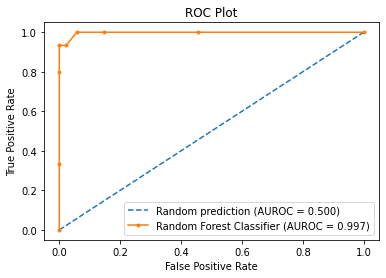

In [45]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Classifier (AUROC = %0.3f)' % rf_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()